In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# import custom made helper functions
from going_modular.going_modular import engine
from helpers import plot_loss_curves

import os
from pathlib import Path
from helper_functions import walk_through_dir

# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

/home/girikk/Biometrics Ear Recognition/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

In [2]:
image_path = Path("dataset/EarVN1.0/Images/")
train_path = Path("dataset/EarVN1.0/train")
valid_path = Path("dataset/EarVN1.0/valid")
test_path  = Path("dataset/EarVN1.0/test")

In [3]:
walk_through_dir(image_path)

There are 164 directories and 0 images in 'dataset/EarVN1.0/Images'.
There are 0 directories and 171 images in 'dataset/EarVN1.0/Images/081.Thanh_D'.
There are 0 directories and 160 images in 'dataset/EarVN1.0/Images/120.Kim_So_H'.
There are 0 directories and 160 images in 'dataset/EarVN1.0/Images/065.Ong_Cao_Th'.
There are 0 directories and 212 images in 'dataset/EarVN1.0/Images/009.Chi_Th'.
There are 0 directories and 202 images in 'dataset/EarVN1.0/Images/071.Quang_B'.
There are 0 directories and 200 images in 'dataset/EarVN1.0/Images/005.Bui_AT'.
There are 0 directories and 200 images in 'dataset/EarVN1.0/Images/117.Kim_Ng'.
There are 0 directories and 161 images in 'dataset/EarVN1.0/Images/043.L_HA'.
There are 0 directories and 208 images in 'dataset/EarVN1.0/Images/024.Gin_Tuan_K'.
There are 0 directories and 161 images in 'dataset/EarVN1.0/Images/086.Tran Dinh Q'.
There are 0 directories and 200 images in 'dataset/EarVN1.0/Images/027.Hamtet_Tr'.
There are 0 directories and 203 i

dataset/EarVN1.0/train/046.Lam_Tr/046 (123).jpg
046
Random image path: dataset/EarVN1.0/train/046.Lam_Tr/046 (123).jpg
Image class: 046
Image height: 109
Image width: 82


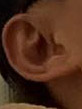

In [4]:
import random
from PIL import Image

#random.seed(69)
# get all image paths
images_path_list = list(train_path.glob("*/*.jpg"))

# plt a random image
rand_image = random.choice(images_path_list)
print(rand_image)

# display the randomly chosen image
image_class = rand_image.parent.stem
print(image_class)

# open image
img = Image.open(rand_image)

# print image metadata
print(f"Random image path: {rand_image}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [5]:
## Transforming data with torchvision.transform
# transform images from jpg

IMAGE_SIZE = 224

# Define the mean and standard deviation of the ImageNet dataset for normalization
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

# Define the transformations
train_data_transform = transforms.Compose([
    # Resize images to 224x224 pixels
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # Random horizontal flipping with a probability of 0.5
    transforms.RandomHorizontalFlip(p=0.5),
    # Random vertical flipping with a probability of 0.5
    transforms.RandomVerticalFlip(p=0.5),
    # Random rotation by 30 degrees
    transforms.RandomRotation(30),
    # Convert the image to a PyTorch tensor
    transforms.ToTensor(),
    # Normalize the image using ImageNet normalization values
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

valid_data_transform = transforms.Compose([
    # Resize images
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    # Turn the image into a torch tensor
    transforms.ToTensor(),
    # Normalize the image using ImageNet normalization values
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

test_data_transform = transforms.Compose([
    # Resize images
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    # Turn the image into a torch tensor
    transforms.ToTensor(),
    # Normalize the image using ImageNet normalization values
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


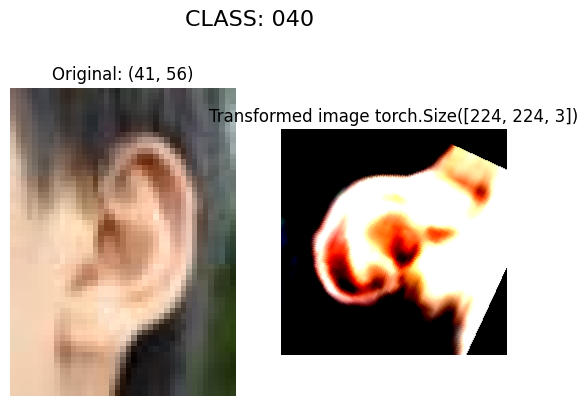

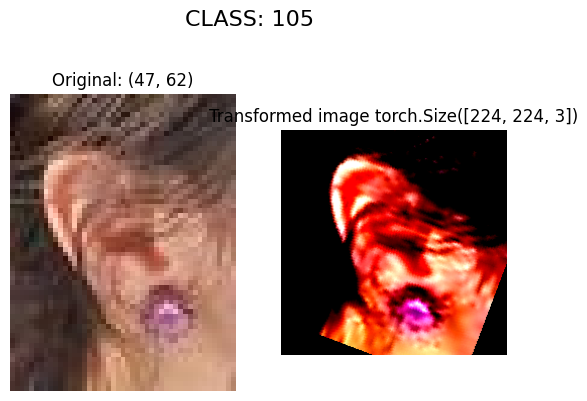

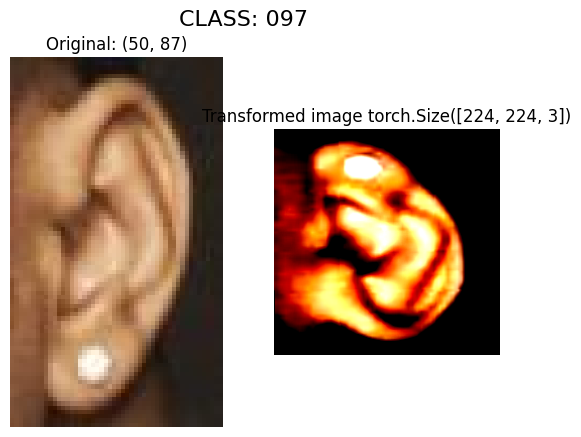

In [6]:
def plot_transformed_images(images_paths: list, transform, n=3, seed=None):
    """ 
    Selects random images from a path of images and loads and transform them and plots
    the orignal + transformed version
    """
    
    if seed:
        random.seed(42)
    random_image_paths = random.sample(images_paths, k=n)
    
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original: {f.size}")
            ax[0].axis(False)
            
            # transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # (C,H,W)->(H,W,C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed image {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"CLASS: {image_path.parent.stem}", fontsize=16)
            
plot_transformed_images(images_path_list, train_data_transform, n=3)

In [7]:
# train_data = datasets.ImageFolder(
#     root=train_path,
#     transform=data_transform,
#     target_transform=None  # used to transform labels)
# )

# valid_data = datasets.ImageFolder(
#     root=valid_path,
#     transform=data_transform,
# )

# test_data = datasets.ImageFolder(
#     root=test_path,
#     transform=data_transform
# )

# train_data, valid_data, test_data

class SubsetImageFolder(datasets.ImageFolder):
    def __init__(self, root, transform=None, target_transform=None, class_count=20):
        super().__init__(root, transform=transform, target_transform=target_transform)
        # Get the first 20 classes
        self.classes = self.classes[:class_count]
        # Filter out samples from classes other than the first 20
        self.samples = [(path, label) for path, label in self.samples if label < class_count]
        # Update class_to_idx mapping for the first 20 classes
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

train_data = SubsetImageFolder(
    root=train_path,
    transform=train_data_transform,
    target_transform=None  # used to transform labels)
)

valid_data = SubsetImageFolder(
    root=valid_path,
    transform=valid_data_transform,
)

test_data = SubsetImageFolder(
    root=test_path,
    transform=test_data_transform
)

train_data, valid_data, test_data

(Dataset SubsetImageFolder
     Number of datapoints: 3743
     Root location: dataset/EarVN1.0/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset SubsetImageFolder
     Number of datapoints: 200
     Root location: dataset/EarVN1.0/valid
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset SubsetImageFolder
     Number of datapoints: 200
     Root location: dataset/Ea

In [8]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_dict

{'001.ALI_HD': 0,
 '002.LeDuong_BL': 1,
 '003.BD_Tran': 2,
 '004.Binz': 3,
 '005.Bui_AT': 4,
 '006.Chau_GK': 5,
 '007.Chau_KP': 6,
 '008.Chi_D': 7,
 '009.Chi_Th': 8,
 '010.Chu_B': 9,
 '011.Cong_To': 10,
 '012.Dai_Nhan': 11,
 '013.Dam_Vinh_H': 12,
 '014.Dan_Ng': 13,
 '015.Dan_Trg': 14,
 '016.Dang_L': 15,
 '017.Dao_Ba_L': 16,
 '018.De_C': 17,
 '019.Don_Ng': 18,
 '020.Duong_D': 19}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image tensor 
tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.

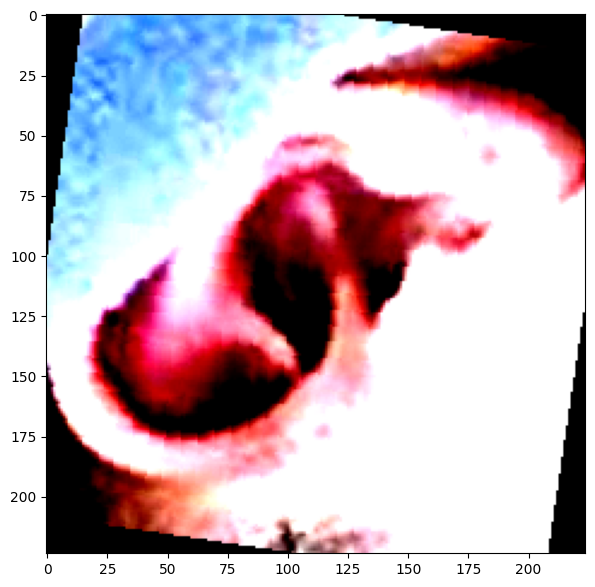

In [9]:
# Visualize smample from train_data dataset

img, label = train_data[56]
print(f"Image tensor \n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Label dtype {type(label), label}")

# rearrange the order dimesniosn
img_permute = img.permute(1, 2, 0)
img_permute

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)

In [10]:
BATCH_SIZE = 16
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

valid_dataloader = DataLoader(
    dataset=valid_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

train_dataloader, valid_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x782ab3d3f9d0>,
 <torch.utils.data.dataloader.DataLoader at 0x782ac4187f50>)

In [11]:
len(train_dataloader), len(valid_dataloader), len(test_dataloader)  # total_samples / batch_size

(234, 13, 13)

In [12]:
img, label = next(iter(train_dataloader))
# batch size is now 1, it can be changed
print(f"Image shape {img.shape} ")
print(f"Label shape {label.shape}")

# for i in range(img.shape[0]):
#     plt.imshow(torch.permute(img[i], [1, 2, 0]))
#     plt.show()

Image shape torch.Size([16, 3, 224, 224]) 
Label shape torch.Size([16])


In [13]:
# Setup the model with pretrained weights and send it to the target device
weights = torchvision.models.Swin_T_Weights.DEFAULT # .DEFAULT = best available weights
model = torchvision.models.swin_t(weights=weights).to(device)

# model_state_dict = torch.load("swin90.pth")
# model.load_state_dict(model_state_dict)

In [14]:
from torchinfo import summary

summary(
    model=model,
    input_size=(BATCH_SIZE, 3, IMAGE_SIZE, IMAGE_SIZE),
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)

Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
SwinTransformer (SwinTransformer)                       [16, 3, 224, 224]    [16, 1000]           --                   True
├─Sequential (features)                                 [16, 3, 224, 224]    [16, 7, 7, 768]      --                   True
│    └─Sequential (0)                                   [16, 3, 224, 224]    [16, 56, 56, 96]     --                   True
│    │    └─Conv2d (0)                                  [16, 3, 224, 224]    [16, 96, 56, 56]     4,704                True
│    │    └─Permute (1)                                 [16, 96, 56, 56]     [16, 56, 56, 96]     --                   --
│    │    └─LayerNorm (2)                               [16, 56, 56, 96]     [16, 56, 56, 96]     192                  True
│    └─Sequential (1)                                   [16, 56, 56, 96]     [16, 56, 56, 96]     --                   True
│    

In [15]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.parameters():
    param.requires_grad = False

model.head

Linear(in_features=768, out_features=1000, bias=True)

In [16]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.head = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=768, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [17]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model, 
        input_size=(BATCH_SIZE, 3, IMAGE_SIZE, IMAGE_SIZE), # (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
SwinTransformer (SwinTransformer)                       [16, 3, 224, 224]    [16, 20]             --                   Partial
├─Sequential (features)                                 [16, 3, 224, 224]    [16, 7, 7, 768]      --                   False
│    └─Sequential (0)                                   [16, 3, 224, 224]    [16, 56, 56, 96]     --                   False
│    │    └─Conv2d (0)                                  [16, 3, 224, 224]    [16, 96, 56, 56]     (4,704)              False
│    │    └─Permute (1)                                 [16, 96, 56, 56]     [16, 56, 56, 96]     --                   --
│    │    └─LayerNorm (2)                               [16, 56, 56, 96]     [16, 56, 56, 96]     (192)                False
│    └─Sequential (1)                                   [16, 56, 56, 96]     [16, 56, 56, 96]     --                   Fal

In [28]:
model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [18]:
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [19]:
def train(model, criterion, optimizer, train_loader):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total
    return train_loss, train_acc

def test(model, criterion, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    test_loss /= len(test_loader)
    test_acc = 100. * correct / total
    return test_loss, test_acc

# Define the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define number of epochs
num_epochs = 10

# Lists to store the training and testing losses and accuracies
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    # Train the model and get training loss and accuracy
    train_loss, train_acc = train(model, criterion, optimizer, train_dataloader)
    
    # Test the model and get testing loss and accuracy
    test_loss, test_acc = test(model, criterion, valid_dataloader)
    
    # Store the losses and accuracies
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    # Print the progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch [1/10], Train Loss: 2.5249, Train Acc: 25.19%, Test Loss: 2.1639, Test Acc: 42.00%
Epoch [2/10], Train Loss: 2.0354, Train Acc: 41.14%, Test Loss: 1.9550, Test Acc: 44.00%
Epoch [3/10], Train Loss: 1.8712, Train Acc: 44.46%, Test Loss: 1.8074, Test Acc: 47.50%
Epoch [4/10], Train Loss: 1.7569, Train Acc: 48.38%, Test Loss: 1.7080, Test Acc: 49.50%
Epoch [5/10], Train Loss: 1.6894, Train Acc: 49.77%, Test Loss: 1.6437, Test Acc: 54.00%
Epoch [6/10], Train Loss: 1.6568, Train Acc: 49.53%, Test Loss: 1.6545, Test Acc: 51.50%
Epoch [7/10], Train Loss: 1.5880, Train Acc: 52.28%, Test Loss: 1.6013, Test Acc: 54.50%
Epoch [8/10], Train Loss: 1.5691, Train Acc: 51.80%, Test Loss: 1.5835, Test Acc: 52.50%
Epoch [9/10], Train Loss: 1.5506, Train Acc: 53.30%, Test Loss: 1.5575, Test Acc: 54.00%
Epoch [10/10], Train Loss: 1.5111, Train Acc: 53.83%, Test Loss: 1.5306, Test Acc: 54.50%


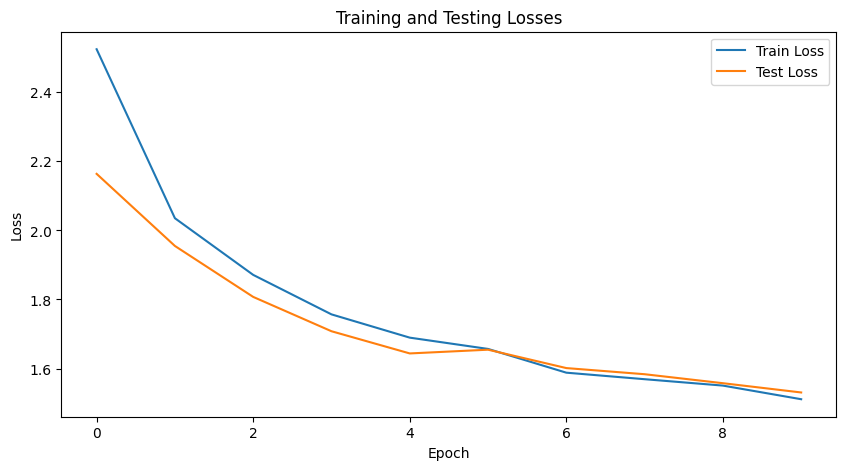

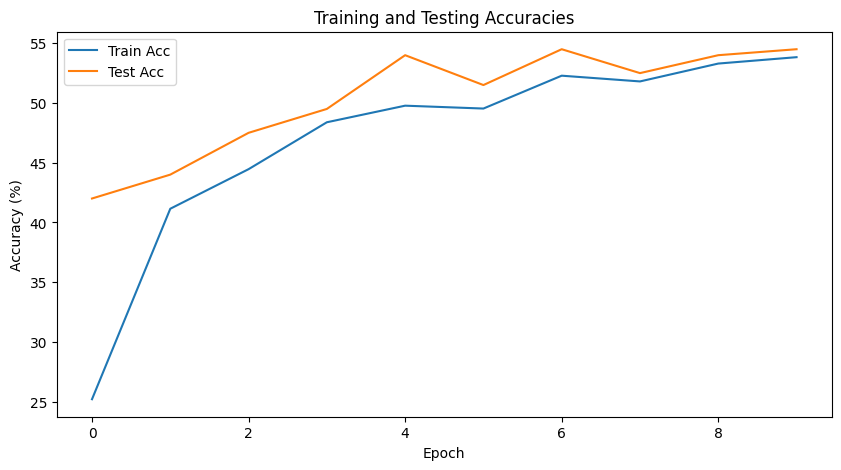

In [20]:
# Plot the training and testing losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()
plt.show()

# Plot the training and testing accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Acc')
plt.plot(test_accuracies, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracies')
plt.legend()
plt.show()


In [30]:
# Get the plot_loss_curves() function from helper_functions.py, download the file if we don't have it
try:
    from helpers import plot_loss_curves
except:
    print("[INFO] Couldn't find helpers.py, downloading...")
    with open("helpers.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helpers.py")
        f.write(request.content)
    from dataset.helpers import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)

NameError: name 'results' is not defined

In [21]:
def test(model, criterion, test_loader, topk=(5,)):
    model.eval()
    test_loss = 0.0
    correct_top1 = 0
    correct_topk = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct_top1 += predicted.eq(targets).sum().item()

            _, predicted_topk = outputs.topk(max(topk), dim=1)
            targets_expanded = targets.view(-1, 1).expand_as(predicted_topk)
            correct_topk += predicted_topk.eq(targets_expanded).sum().item()

    test_loss /= len(test_loader)
    test_acc_top1 = 100. * correct_top1 / total
    test_acc_topk = [100. * correct_topk / total for k in topk]
    return test_loss, test_acc_top1, test_acc_topk


In [22]:
test(model, criterion, test_dataloader)

(1.502595447576963, 58.0, [85.0])

### GRADCAM VISUALIZATION

In [36]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model, 
        input_size=(BATCH_SIZE, 3, IMAGE_SIZE, IMAGE_SIZE), # (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)


Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
SwinTransformer (SwinTransformer)                       [16, 3, 224, 224]    [16, 20]             --                   True
├─Sequential (features)                                 [16, 3, 224, 224]    [16, 7, 7, 768]      --                   True
│    └─Sequential (0)                                   [16, 3, 224, 224]    [16, 56, 56, 96]     --                   True
│    │    └─Conv2d (0)                                  [16, 3, 224, 224]    [16, 96, 56, 56]     4,704                True
│    │    └─Permute (1)                                 [16, 96, 56, 56]     [16, 56, 56, 96]     --                   --
│    │    └─LayerNorm (2)                               [16, 56, 56, 96]     [16, 56, 56, 96]     192                  True
│    └─Sequential (1)                                   [16, 56, 56, 96]     [16, 56, 56, 96]     --                   True
│    

In [32]:
a = list(model.named_children())

In [49]:
a[0][1]

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    (1): Permute()
    (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  )
  (1): Sequential(
    (0): SwinTransformerBlock(
      (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (attn): ShiftedWindowAttention(
        (qkv): Linear(in_features=96, out_features=288, bias=True)
        (proj): Linear(in_features=96, out_features=96, bias=True)
      )
      (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (mlp): MLP(
        (0): Linear(in_features=96, out_features=384, bias=True)
        (1): GELU(approximate='none')
        (2): Dropout(p=0.0, inplace=False)
        (3): Linear(in_features=384, out_features=96, bias=True)
        (4): Dropout(p=0.0, inplace=False)
      )
    )
    (1): SwinTransformerBlock(
      (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (attn): Sh

In [51]:
a[0][1][-1][0]

SwinTransformerBlock(
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (attn): ShiftedWindowAttention(
    (qkv): Linear(in_features=768, out_features=2304, bias=True)
    (proj): Linear(in_features=768, out_features=768, bias=True)
  )
  (stochastic_depth): StochasticDepth(p=0.18181818181818182, mode=row)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (mlp): MLP(
    (0): Linear(in_features=768, out_features=3072, bias=True)
    (1): GELU(approximate='none')
    (2): Dropout(p=0.0, inplace=False)
    (3): Linear(in_features=3072, out_features=768, bias=True)
    (4): Dropout(p=0.0, inplace=False)
  )
)

In [52]:
from pytorch_grad_cam import GradCAM

GradCAM(model=model, target_layers=a[0][1][-1][0], reshape_transform=None)

def reshape_transform(tensor, height=7, width=7):
    result = tensor.reshape(tensor.size(0),
        height, width, tensor.size(2))

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    return result

TypeError: 'SwinTransformerBlock' object is not iterable